7878 - comprimento original antes da divisão
1313 - comprimento de uma unica coluna
6.0 - número de colunas

2950.0556 78.508 82.5 1.7724 -999.0 -999.0
2974.7444 3083.558 3103.5224


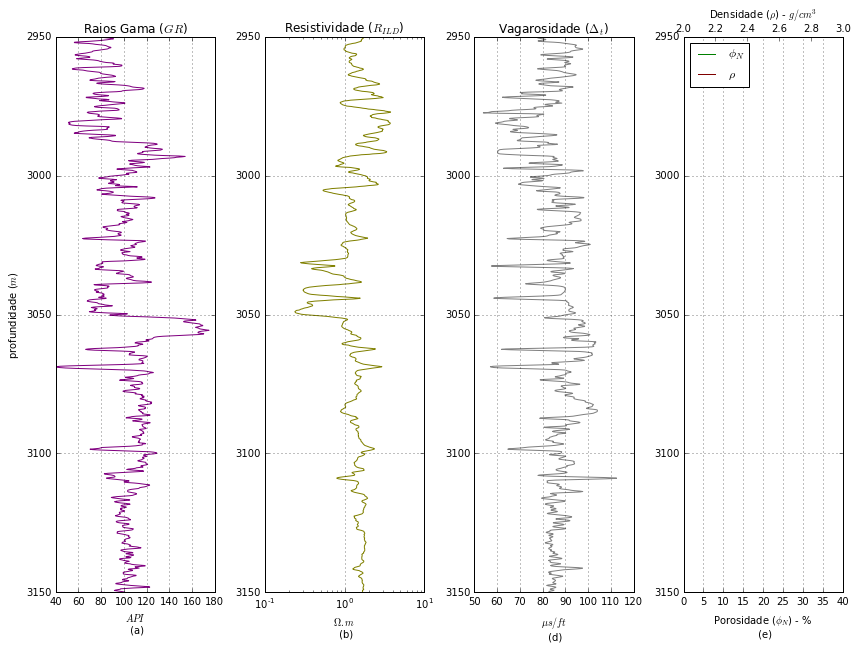

In [1]:
#
#NA09
#
%matplotlib inline
from pylab import *;import scipy as sp;import numpy as np;import matplotlib.pyplot as plt;
import matplotlib.patches as mpatches;import matplotlib.mlab as mlab;from matplotlib.gridspec import GridSpec
from mpl_toolkits.axes_grid1 import make_axes_locatable;from matplotlib.colors import LogNorm
from matplotlib.ticker import MultipleLocator
#-----------------------------------------------------#
name0 = '09';name1 = 'na'+name0;name2 = 'na-'+name0
#----------------Armazenando os Dados----------------------------------------------------#

data  = np.fromfile('../banco_de_dados_original/NA09D.dat', dtype=float, count=-1, sep='	');alph=len(data)/1313
p = int (len(data)/alph)

print (len(data),'- comprimento original antes da divisão');print (p,'- comprimento de uma unica coluna')
print (alph,'- número de colunas');data  = np.reshape(data, (len(data)/alph,alph))
#----------------------------------------As propriedades petrofisicas do poco-------------------------------------#
prof=np.array(data[:,0],float);DTP=np.array(data[:,1],float);GR=np.array(data[:,2],float)
ILD  = np.array(data[:,3],float);PHIN = np.array(data[:,4],float);RHOb = np.array(data[:,5],float)
print ();print (prof[0],DTP[0],GR[0],ILD[0],PHIN[0],RHOb[0]);print(prof[162],prof[876],prof[1007]);del(data,alph)
#-------------------------------------------------------Graficos--------------------------------------------------#
fig, (ax1, ax2, ax4, ax5) = plt.subplots(1,4);fig.suptitle('', fontsize=20);fig.set_size_inches(12, 10)
#--------------------------------------------------------------------------------------------------#
ax1.plot(GR,prof,'-',linewidth = 1,color='purple',label='$GR$');ax1.set_title(u'Raios Gama ($GR$)')
ax1.set_ylabel('profundidade ($m$)');ax1.set_xlabel('$API$ \n (a)');ax1.set_ylim(ymax=max(prof),ymin=min(prof))
ax1.invert_yaxis();ax1.grid()
#--------------------------------------------------------------------------------------------------#
ax2.semilogx(ILD,prof,'-',linewidth = 1,color='olive',label='$ILD$');ax2.set_title(u'Resistividade ($R_{ILD}$)')
ax2.set_xlabel('$\Omega.m$ \n (b)');ax2.set_ylim(ymax=max(prof),ymin=min(prof));ax2.invert_yaxis();ax2.grid()
#--------------------------------------------------------------------------------------------------#
ax4.plot(DTP ,prof,'-',linewidth = 1,color='Gray',label='$V_P$');ax4.set_title('Vagarosidade ($\Delta _t$)')   
ax4.set_xlabel('$\mu s / ft$ \n (d)');ax4.set_ylim(ymax=max(prof),ymin=min(prof));ax4.invert_yaxis();ax4.grid()
#--------------------------------------------------------------------------------------------------#
lab5 = ax5.plot(PHIN,prof,'-',linewidth = 1,color='green',label='$\phi_N$')
ax5.set_xlabel('Porosidade ($\phi_N$) - % \n (e)');ax0 = ax5.twiny()
lab0 = ax0.plot(RHOb,prof,'-',linewidth = 1,color='maroon',label='$\\rho$')
ax0.set_xlabel('Densidade ($\\rho$) - $g/cm^3$');labf = lab5+lab0
labs = [l.get_label() for l in labf];plt.legend(labf, labs, loc=2);ax5.set_ylim(ymax=max(prof),ymin=min(prof))
ax0.set_xlim(xmax=3.0,xmin=2.0);ax5.set_xlim(xmax=40.0,xmin=0.0);ax5.invert_yaxis();ax5.grid()
#--------------------------------------------------------------------------------------------------#
plt.tight_layout();plt.subplots_adjust(top=0.85);plt.show()

<br><center><font face="Times New ROman" size="6" color="#000000">- Correções -</font></center>
<br>  -> $\rho_b (GR,VP) = 1.97 - 1.50^{-3} GR + 0.10 VP$ - Augusto
<br>  -> $\rho_b (GR,VP) = 1.97 - 1.50.10^{-3} GR + 1.038.10^{-4} VP$ - Augusto corrigido
<br>  -> $\phi_N (GR,\rho_ b) = 75.40 + 0.90 GR - 24.37 \rho_b $ - Augusto

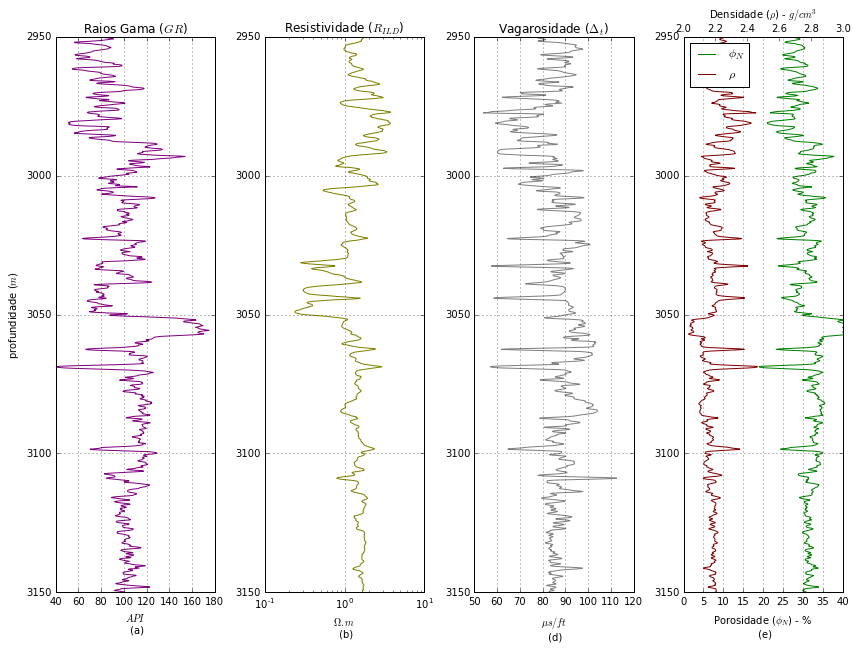

In [6]:
#------------------------------Interpolacao RHOb -999.00000 
cfvp = 3.2808*(10**(-6)) # conversao us/ft -> s/m

VP=[] # velocidade de onda P
for i in range(p):
    VP.append(1.0000/(cfvp*DTP[i]))

RHOb2 = [];PHIN2 = []

for i in range (p):
    RHOb2.append(  1.97 -  ((1.50*(10**(-3)))*GR[i]) + (1.038*(10**(-4)))*VP[i] )

for i in range (p):
    RHOb[i] = RHOb2[i]
#------------------------------

for i in range (p):
    PHIN2.append(75.40 + (0.09*GR[i]) - (24.37*RHOb[i]))

for i in range (p):
    if PHIN[i] == -999.000:
        PHIN[i] = PHIN2[i]
        
fig, (ax1, ax2, ax4, ax5) = plt.subplots(1,4);fig.suptitle('', fontsize=20);fig.set_size_inches(12, 10)
#--------------------------------------------------------------------------------------------------#
ax1.plot(GR,prof,'-',linewidth = 1,color='purple',label='$GR$');ax1.set_title(u'Raios Gama ($GR$)')
ax1.set_ylabel('profundidade ($m$)');ax1.set_xlabel('$API$ \n (a)');ax1.set_ylim(ymax=max(prof),ymin=min(prof))
ax1.invert_yaxis();ax1.grid()
#--------------------------------------------------------------------------------------------------#
ax2.semilogx(ILD,prof,'-',linewidth = 1,color='olive',label='$ILD$');ax2.set_title(u'Resistividade ($R_{ILD}$)')
ax2.set_xlabel('$\Omega.m$ \n (b)');ax2.set_ylim(ymax=max(prof),ymin=min(prof));ax2.invert_yaxis();ax2.grid()
#--------------------------------------------------------------------------------------------------#
ax4.plot(DTP ,prof,'-',linewidth = 1,color='Gray',label='$V_P$');ax4.set_title('Vagarosidade ($\Delta _t$)')   
ax4.set_xlabel('$\mu s / ft$ \n (d)');ax4.set_ylim(ymax=max(prof),ymin=min(prof));ax4.invert_yaxis();ax4.grid()
#--------------------------------------------------------------------------------------------------#
lab5 = ax5.plot(PHIN,prof,'-',linewidth = 1,color='green',label='$\phi_N$')
ax5.set_xlabel('Porosidade ($\phi_N$) - % \n (e)');ax0 = ax5.twiny()
lab0 = ax0.plot(RHOb,prof,'-',linewidth = 1,color='maroon',label='$\\rho$')
ax0.set_xlabel('Densidade ($\\rho$) - $g/cm^3$');labf = lab5+lab0
labs = [l.get_label() for l in labf];plt.legend(labf, labs, loc=2);ax5.set_ylim(ymax=max(prof),ymin=min(prof))
ax0.set_xlim(xmax=3.0,xmin=2.0);ax5.set_xlim(xmax=40.0,xmin=0.0);ax5.invert_yaxis();ax5.grid()
#--------------------------------------------------------------------------------------------------#
plt.tight_layout();plt.subplots_adjust(top=0.85);plt.show()

0.448374542125 media (IGR) - indice de raio gama
0.202107143189  media (VSH) - quantidade de folhelho 
2.65 RHOma| 1.101 RHOf 55.5 DTPm 189.0 DTPf

29.5575586314  media (PHItd)%
1.47920106272  media (PHIsh)%
179  ponto de folhelho (Psh)
22.09737827715356 = porosidade sh tabelada| 16.3473160137 = porosidade sh calculada
28.383275682 = porosidade D, tabelada| 26.9925034414 = porosidade D, calculada


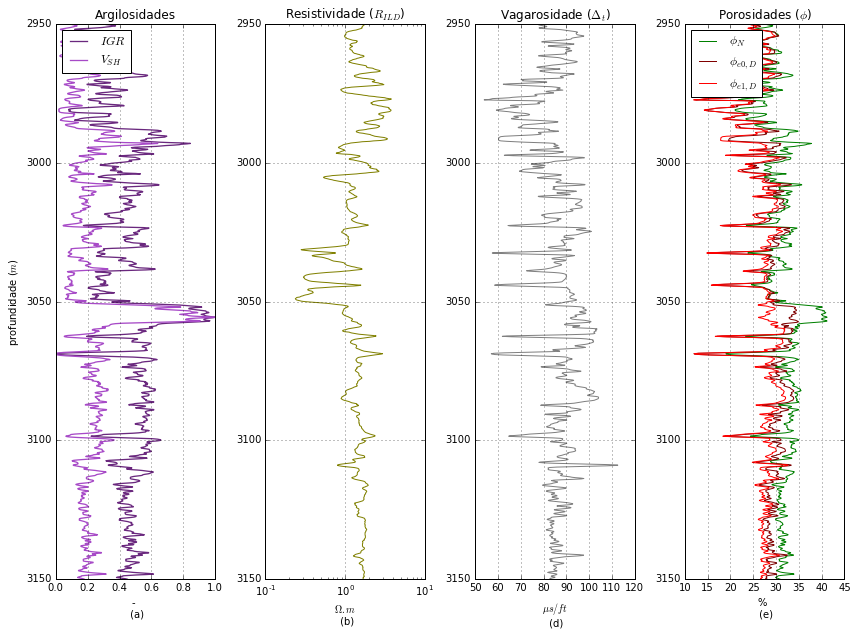

In [7]:
#
#Raio Gamma
#
IGR = [];VSH = []

for i in range (p):
    IGR0 = (GR[i] - min(GR))/(max(GR) - min(GR)) # Calculo da Argilosidade (basica, Schlumberger) 
    IGR.append(IGR0)
    Larionov0 = 0.083*((2**(3.70*IGR0))-1)       # Correcao de Larionov para Argilosidade
    VSH.append(Larionov0)
    
print(mean(IGR),'media (IGR) - indice de raio gama');print(mean(VSH),' media (VSH) - quantidade de folhelho ')
#
#Porosidade
#
RHOf  = 1.101;DTPf = 189.0;RHOma = 2.65;DTPma = 55.5;RHOsh = 2.56;DTPsh = 85.0
print (RHOma, 'RHOma|',RHOf,'RHOf',DTPma,'DTPm',DTPf,'DTPf')
#------------------------------------------------------------------------------------------------#
PHItd = [];PHIsh = [] # Porosidade total - perfil densidade e Porosidade aparente - folhelho

for i in range (p):
    PHItd0 = (100*(RHOb[i] - RHOma)/(RHOf - RHOma))# Porosidade total - perfil densidade
    PHIsh.append(PHIN[i] - PHItd0)
    PHItd.append(PHItd0)
print ();print (mean(PHItd),' media (PHItd)%');print (mean(PHIsh),' media (PHIsh)%')
#------------------------------------------------------------------------------------------------#
for i in range (p):
    if PHIsh[i] == max(PHIsh):Psh = i
        
print (Psh,' ponto de folhelho (Psh)');RHOsh2 = RHOb[Psh];VPsh2  = 108.8*(RHOsh2**4.0)
DTPsh2 = 1.0/((3.2808*(10**(-6)))*VPsh2)
PHIs0  = 100.0*((DTPsh - DTPma)/(DTPf - DTPma));PHIs1 = 100.0*((DTPsh2 - DTPma)/(DTPf - DTPma))
print (PHIs0,'= porosidade sh tabelada|',PHIs1,'= porosidade sh calculada')
#--------------------------------Porosidade Efetiva Densidade------------------------------------#
PHIed0 = [];PHIed1 = []
for i in range (p):
    PHIed0.append((((RHOb[i] - RHOma)/(RHOf - RHOma)) - ((VSH[i])*(RHOsh  - RHOma)/(RHOf - RHOma)))*100)
    PHIed1.append((((RHOb[i] - RHOma)/(RHOf - RHOma)) - ((VSH[i])*(RHOsh2 - RHOma)/(RHOf - RHOma)))*100)
    
print (mean(PHIed0),'= porosidade D, tabelada|',mean(PHIed1),'= porosidade D, calculada')
#--------------------------------------------------------Graficos------------------------------------------------#
fig, (ax1, ax2, ax4, ax5) = plt.subplots(1,4);fig.suptitle('', fontsize=20);fig.set_size_inches(12, 10)
#--------------------------------------------------------------------------------------------------#
ax1.plot(IGR,prof,'-',linewidth = 1.3,color='#6A287E',label='$IGR$')
ax1.plot(VSH,prof,'-',linewidth = 1.3,color='#A74AC7',label='$V_{SH}$')
ax1.set_title(u'Argilosidades');ax1.set_xlabel('- \n (a)');ax1.set_ylabel('profundidade ($m$)')
ax1.set_ylim(ymax=max(prof),ymin=min(prof));ax1.invert_yaxis();ax1.grid();ax1.legend(loc=2)
#--------------------------------------------------------------------------------------------------#
ax2.semilogx(ILD,prof,'-',linewidth = 1,color='olive',label='$ILD$')
ax2.set_title(u'Resistividade ($R_{ILD}$)');ax2.set_xlabel('$\Omega.m$ \n (b)')
ax2.set_ylim(ymax=max(prof),ymin=min(prof));ax2.invert_yaxis();ax2.grid()
#--------------------------------------------------------------------------------------------------#
ax4.plot(DTP ,prof,'-',linewidth = 1,color='Gray',label='$V_P$');ax4.set_title('Vagarosidade ($\Delta _t$)')    
ax4.set_xlabel('$\mu s / ft$ \n (d)');ax4.set_ylim(ymax=max(prof),ymin=min(prof));ax4.invert_yaxis();ax4.grid()
#--------------------------------------------------------------------------------------------------#
ax5.plot(PHIN  ,prof,'-',linewidth = 1,color='Green' ,label='$\phi_N$')
ax5.plot(PHIed0,prof,'-',linewidth = 1,color='Maroon',label='$\phi_{e0,D}$')
ax5.plot(PHIed1,prof,'-',linewidth = 1,color='red',label='$\phi_{e1,D}$')
ax5.set_title('Porosidades ($\phi$)');ax5.set_xlabel('% \n (e)');ax5.set_ylim(ymax=max(prof),ymin=min(prof))
ax5.invert_yaxis();ax5.grid();ax5.legend(loc=2)
#--------------------------------------------------------------------------------------------------#
plt.tight_layout();plt.subplots_adjust(top=0.85);plt.show();del(IGR)

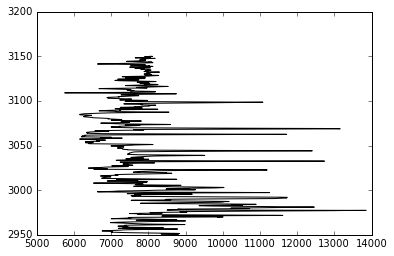

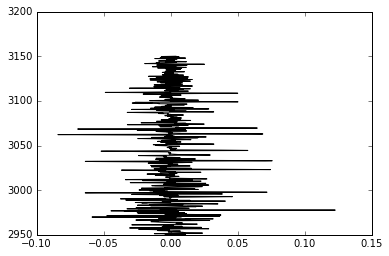

In [8]:
#--------------------------------------Impedancia---(transformado de pe pra m)-----------------------------------#
RHOsi = []

for i in range (p):
    RHOsi.append(RHOb[i]*0.001) # convertendo de g/cm3 para Kg/m3 (S.I.)
#------------------------------------------------------Impedancia Acustica---------------------------------------#
z_imp = [];z_imp_e = [];z_imp_p = [] # Impedancias acusticas(m/s).(g/cm3)
Z = [] # Impedancias acusticas (Km/s).(g/cm3)

for i in range (p):
    z_imp0 = (RHOsi[i]*VP  [i]);z_imp.append(z_imp0);Z.append(z_imp0*1000.000)
    #------------------------------------------------------------------------------------------------------------#
plt.plot(Z ,prof,'-k',linewidth = 1);plt.show()
#-----------------------------------------------Refletividades---------------------------------------------------#
R = [] # Refletividades

for i in range (p):
    if i == 0:
        RR = 0
    if i != 0:
        RR = (z_imp[i-1] - z_imp[i])/(z_imp[i-1] + z_imp[i])
    R.append(RR)
    
zero_bar = [0]*p
#-------------------------------------------------------------------------------------------------------------#
plt.plot(R ,prof,'-k',linewidth = 1);plt.show()

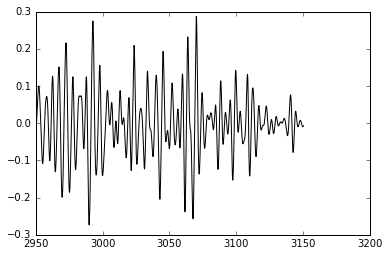

-----------valores de VP-------------
3594.85 m/s   - media 
5646.99 m/s   - valor maximo
2708.5 m/s   - valor minimo
187603.01 m²/s² - variancia
433.13 m/s   - desvio padrao
-------------------------------------


In [9]:
#----------------------------------------------Amplitude Sismica--------------------------------------------------#
DL = prof[3]-prof[2];To = [];f = 600

for i in range (p):
    To.append(DL/VP[i])
    
TTT = np.cumsum(To)

signal = []
for j in range (p):
    wavk = []
    for i in range (len(TTT)):
        EE1 = -(np.pi**2)*(f**2)*((TTT[j] - TTT[i])**2)
        wav0 = R[i]*(1 - (2*(np.pi**2)) * (f**2) * ((TTT[j] - TTT[i])**2))*np.exp(EE1);wavk.append(wav0)
    FXO1 = np.sum(wavk)
    signal.append(FXO1)
    
plt.plot(prof,signal ,'-k');plt.show()
#-----------------------------------------------------------------------------------------------------------#
RV = 2;medVP=round(np.mean(VP),RV);maxVP=round(max(VP),RV);minVP=round(min(VP),RV);varVP=round(np.var(VP),RV)
stdVP=round(np.std (VP),RV)
#----------------------------------------------#
print ("-----------valores de VP-------------");print (medVP,"m/s   - media ");print (maxVP,"m/s   - valor maximo")
print (minVP,"m/s   - valor minimo");print (varVP,"m²/s² - variancia");print (stdVP,"m/s   - desvio padrao")
print ("-------------------------------------")
#----------------------------------------------#

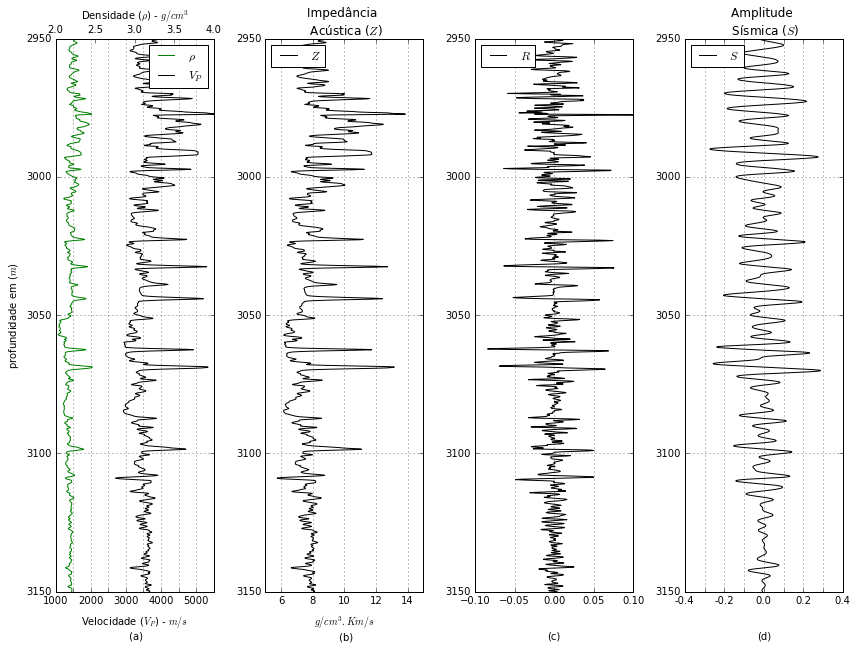

In [10]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4);fig.set_size_inches(12, 10)
#--------------------------------------------------------------------------------------------------#
lab1=ax1.plot(PHIN,prof,'-k',linewidth=1,label='$\phi_N$')
lab1=ax1.plot(VP ,prof,'-k',linewidth =1,label='$V_P$')
ax1.set_ylabel('profundidade em ($m$)');ax0=ax1.twiny()

lab0 = ax0.plot(RHOb,prof,'-g',linewidth = 1,label='$\\rho$');ax0.set_xlabel('Densidade ($\\rho$) - $g/cm^3$')
ax1.set_xlabel('Velocidade ($V_P$) - $m/s$ \n (a)');labf = lab0+lab1;labs=[l.get_label()for l in labf]
plt.legend(labf, labs, loc=0);ax1.set_ylim(ymax=max(prof),ymin=min(prof));ax1.set_xlim(xmax=5500,xmin=1000)
ax0.set_xlim(xmax=4,xmin=2);ax1.invert_yaxis();ax1.grid()
ax1.set_xticklabels([1000," ",2000," ",3000," ",4000," ",5000," "])
#--------------------------------------------------------------------------------------------------#
ax2.plot(z_imp  ,prof,'-k',linewidth = 1,label='$Z$')
ax2.set_title(u'Impedância \n Acústica ($Z$)');ax2.set_xlabel('$g/cm^3 . Km/s$ \n (b)')
ax2.set_ylim(ymax=max(prof),ymin=min(prof));ax2.set_xlim(xmax=15,xmin=5);ax2.invert_yaxis();ax2.grid()
ax2.legend(loc=2)
#--------------------------------------------------------------------------------------------------#
ax3.plot(R ,prof,'-k',linewidth = 1,label='$R$')
ax3.set_xlabel('(c)');ax3.xaxis.set_label_coords(0.5, -0.07);ax3.set_ylim(ymax=max(prof),ymin=min(prof))
ax3.set_xlim(xmax=0.1,xmin=-0.1);ax3.invert_yaxis();ax3.grid();ax3.legend(loc=2)
#--------------------------------------------------------------------------------------------------#
ax4.plot(signal ,prof,'-k',linewidth = 1,label='$S$');ax4.set_title('Amplitude \n Sísmica ($S$)')
ax4.set_xlabel('(d)');ax4.xaxis.set_label_coords(0.5, -0.07);ax4.set_ylim(ymax=max(prof),ymin=min(prof))
ax4.set_xlim(xmax=0.4,xmin=-0.4);ax4.invert_yaxis();ax4.set_xticklabels([-0.4," ",-0.2," ",0.0," ",0.2," ",0.4])
ax4.grid();ax4.legend(loc=2)
#--------------------------------------------------------------------------------------------------#
plt.tight_layout();plt.subplots_adjust(top=0.85);plt.show()

name_b = '../../mario_tese/Figs/pocos/RJS'+name0+'perfil2.png';transparent=True
fig.savefig(name_b, dpi=100, transparent=True, bbox_inches='tight')

In [11]:
X = [352375]*p
Y = [7518585]*p

#-----------Nota: caso o sonico nao exista, os valores de augusto e siqueira sao os originais.
#-----------Caso contrario, sao os modelos testados

filef = np.array([[-999.000]*14]*p)
filef[:,0] = X
filef[:,1] = Y
filef[:,2] = prof   # profundidade
filef[:,3] = DTP    # sonico 
filef[:,4] = GR     # gama ray
filef[:,5] = ILD    # resistividade
filef[:,6] = PHIN   # porosidade neutronica
filef[:,7] = RHOb   # densidade

#----------------Siqueira----------------------#

filef[:,8] = z_imp  # Impedancia acustica
filef[:,9] = R      # Refletividade
filef[:,10] = signal # Sismograma sintetico

#----------------Augusto-----------------------#

filef[:,11]= z_imp  # Impedancia acustica
filef[:,12]= R      # Refletividade
filef[:,13]= signal # Sismograma sintetico

np.savetxt('../banco_de_dados_mario/na09_mario.dat', filef, delimiter=' ', fmt='%.4f')